# HW3B - Pandas Fundamentals

See Canvas for details on how to complete and submit this assignment.

## Introduction

This assignment transitions you from NumPy's numerical array operations to Pandas' powerful tabular data manipulation. While NumPy excels at homogeneous numerical arrays, Pandas is designed for the heterogeneous, labeled data that characterizes most real-world datasets—mixing dates, categories, numbers, and text within the same table.

You'll work with real bike share data from Chicago's Divvy system to answer questions about urban transportation patterns. Through three progressively complex problems—exploring usage patterns, analyzing rider behavior, and conducting temporal analysis—you'll discover why Pandas has become the standard tool for data analysis in Python.

The assignment emphasizes Pandas' design philosophy: named column access, explicit indexing methods (loc/iloc), handling missing data, and method chaining for readable data pipelines. You'll also see how Pandas builds on NumPy while adding the structure and convenience needed for practical data science work.

This assignment should take 3-5 hours to complete.

Before submitting, ensure your notebook:

- Runs completely with "Kernel → Restart & Run All"
- Includes thoughtful responses to all interpretation questions
- Uses clear variable names and follows good coding practices
- Shows your work (don't just print final answers)

### Learning Objectives

By completing this assignment, you will be able to:

1. **Construct and manipulate Pandas data structures**
   - Create DataFrames from dictionaries and CSV files
   - Distinguish between Series and DataFrame objects
   - Set and reset index structures appropriately
   - Understand when operations return views vs copies
2. **Apply explicit indexing paradigms**
   - Use `loc[]` for label-based data access
   - Use `iloc[]` for position-based data access
   - Access columns using bracket notation
   - Explain when each indexing method is appropriate
3. **Diagnose and explore datasets systematically**
   - Use `info()`, `describe()`, `head()`, and `dtypes` to understand data structure
   - Identify missing values with `isna()` and `notna()`
   - Calculate summary statistics across different axes
   - Interpret value distributions with `value_counts()`
4. **Filter data with boolean indexing and queries**
   - Combine multiple conditions with `&`, `|`, and `~` operators
   - Use `isin()` for membership testing
   - Apply `query()` for readable complex filters
   - Understand how index alignment affects operations
5. **Work with datetime data**
   - Parse dates during CSV loading
   - Extract temporal components with the `.dt` accessor
   - Filter data by date ranges
   - Create time-based derived features
6. **Connect Pandas patterns to data analysis workflows**
   - Formulate questions that data can answer
   - Choose appropriate methods for different analysis tasks
   - Interpret results in domain context
   - Recognize when vectorized operations outperform apply()

### Generative AI Allowance

You may use GenAI tools for brainstorming, explanations, and code sketches if you disclose it, understand it, and validate it. Your submission must represent your own work and you are solely responsible for its correctness.

### Scoring

Total of 90 points available, will be graded out of 80. Scores of >100% are allowed.

Distribution:

- Tasks: 48 pts
- Interpretation: 32 pts
- Reflection: 10 pts

Points by Problem:

- Problem 1: 3 tasks, 10 pts
- Problem 2: 4 tasks, 14 pts
- Problem 3: 4 tasks, 14 pts
- Problem 4: 3 tasks, 10 pts

Interpretation Questions:

- Problem 1: 3 questions, 8 pts
- Problem 2: 4 questions, 8 pts
- Problem 3: 3 questions, 8 pts
- Problem 4: 3 questions, 8 pts

Graduate differentiation: poor follow-up responses will result in up to a 5pt deduction for that problem.

## Dataset: Chicago Divvy Bike Share

The dataset you will analyze is based on real trip information from Divvy, Chicago's bike share system. It contains individual trips with start/end times, station information, and rider type.

Dataset homepage: https://divvybikes.com/system-data

Each trip includes:

- Trip start and end times (datetime)
- Start and end station names and IDs
- Rider type (member vs casual)
- Bike type (classic, electric, or docked)

Chicago's Department of Transportation uses this data to optimize station placement, understand usage patterns, and improve service. You'll explore similar questions that real transportation analysts investigate.

## Problems

### Problem 1: Creating DataFrames from Scratch

Before loading data from files, you need to understand how Pandas structures are built. In this problem, you'll create Series and DataFrames manually using Python's built-in data structures. This is a quick warmup to establish the fundamentals.

#### Task 1a: Create a Series

Create a Series called `temperatures` representing daily high temperatures for a week:

- Monday: 72°F
- Tuesday: 75°F  
- Wednesday: 68°F
- Thursday: 71°F
- Friday: 73°F

Use the day names as the index. Print the Series and its data type.

##### Your Code

In [2]:
import pandas as pd

og_temperatures = {
    'Monday': 72,
    'Tuesday': 75,
    'Wednesday': 68,
    'Thursday': 71,
    'Friday': 73
}

df = pd.DataFrame(og_temperatures, index=[0])
df.head()

,Monday,Tuesday,Wednesday,Thursday,Friday
0,72,75,68,71,73


#### Task 1b: Create a DataFrame from a Dictionary

Create a DataFrame called `products` with the following data:

| product | price | quantity |
|---------|-------|----------|
| Widget  | 19.99 | 100 |
| Gadget  | 24.99 | 75 |
| Doohickey | 12.49 | 150 |

Use a dictionary where keys are column names and values are lists. Print the DataFrame and report its shape.

##### Your Code

In [3]:
products = pd.DataFrame({
    'product': ['Widget', 'Gadget', 'Doohickey'],
     #   'price': [12.49, 24.99, 19.99],
    #'quantity': [150, 75, 100]
    'price': [19.99, 24.99, 12.49],
    'quantity': [100, 75, 150]
})

products.head()


,product,price,quantity
0,Widget,19.99,100
1,Gadget,24.99,75
2,Doohickey,12.49,150


#### Task 1c: Access DataFrame Elements

Using the `products` DataFrame from Task 1b, extract and print:

1. The `price` column as a Series
2. The `product` and `quantity` columns as a DataFrame (using a list of column names)

##### Your Code

In [4]:
print(products['price'])




0    19.99
1    24.99
2    12.49
Name: price, dtype: float64


In [5]:
print(products[['product', 'quantity']])

     product  quantity
0     Widget       100
1     Gadget        75
2  Doohickey       150


In [7]:
subset = products[['product', 'quantity']]
subset.head()

,product,quantity
0,Widget,100
1,Gadget,75
2,Doohickey,150


#### Interpretation

Answer the following questions (briefly / concisely) in the markdown cell below:

1. Data structure mapping: When you create a DataFrame from a dictionary (like in Task 1b), what do the dictionary keys become? What do the values become?
2. Bracket notation: Why does `df['price']` return a Series, but `df[['price']]` return a DataFrame? What's the difference in what you're asking for?
3. Index purpose: In Task 1a, you used day names as the index instead of default numbers (0, 1, 2...). When would a custom index like this be more useful than the default numeric index?

##### Your Answers

*Problem 1 interpretation here*

TODO

### Problem 2: Loading and Initial Exploration

Before starting this problem, make sure you are working in a copy of this file in the `my_repo` folder you created in HW2a. You must also have a copy of the file `202410-divvy-tripdata-100k.csv` in a subdirectory called `data`. That file structure is illustrated below.

```text
~/insy6500/my_repo
└── homework
    ├── data
    │   └── 202410-divvy-tripdata-100k.csv
    └── hw3b.ipynb
```

#### Task 2a: Load and Understand Raw Data

Start by loading the data "as-is" to get a general understanding of the overall structure and how Pandas interprets it by default.

Note on file paths: The provided code uses `Path` from Python's `pathlib` module to handle file paths. Path objects work consistently across operating systems (Windows uses backslashes `\`, Mac/Linux use forward slashes `/`), automatically using the correct separator for your system. The provided code defines `csv_path` which should be used as the filename in your `pd.read_csv` to load the data file.

1. Use `pd.read_csv` to load `csv_path` (provided below) without specifying any other arguments. Assign it to the variable `df_raw`.
2. Use the methods we described in class to explore the shape, structure, types, etc. of the data. In particular, consider which columns represent dates or categories.
3. Note the amount of memory used by the dataset. See the section on memory diagnostics in notebook 07a for appropriate code snippets using `memory_usage`.

##### Your Code

In [33]:
import pandas as pd
import numpy as np
from pathlib import Path

# create a OS-independent pointer to the csv file created by Setup
csv_path = Path('./data/202410-divvy-tripdata-100k.csv')

# load and explore the data below (create additional code / markdown cells as necessary)
df = pd.read_csv(csv_path)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,67BB74BD7667BAB7,electric_bike,2024-09-30 23:12:01.622,2024-10-01 00:20:00.674,Oakley Ave & Touhy Ave,bdd4c3,NaN,NaN,42.012342,-87.688243,41.970000,-87.650000,casual
1,5AF1AC3BA86ED58C,electric_bike,2024-09-30 23:19:25.409,2024-10-01 00:42:09.933,NaN,NaN,Benson Ave & Church St,a10cf0,42.070000,-87.730000,42.048214,-87.683485,casual
2,7961DD2FC1280CDC,classic_bike,2024-09-30 23:32:24.672,2024-10-01 00:23:18.647,St. Clair St & Erie St,9c619a,LaSalle St & Illinois St,fbd1ad,41.894345,-87.622798,41.890762,-87.631697,member
3,2E16892DEEF4CC19,classic_bike,2024-09-30 23:42:11.207,2024-10-01 00:10:16.831,Ashland Ave & Chicago Ave,72a04d,Loomis St & Archer Ave,896337,41.895954,-87.667728,41.841633,-87.657435,casual
4,AAF0220F819BEE01,electric_bike,2024-09-30 23:49:25.380,2024-10-01 00:06:27.476,900 W Harrison St,11da85,900 W Harrison St,11da85,41.874754,-87.649807,41.874754,-87.649807,member


In [34]:
df.info()
#This is where memory usage can be seen. 
#For this example it is using "9.9+ MB"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             100000 non-null  object 
 1   rideable_type       100000 non-null  object 
 2   started_at          100000 non-null  object 
 3   ended_at            100000 non-null  object 
 4   start_station_name  89623 non-null   object 
 5   start_station_id    89623 non-null   object 
 6   end_station_name    89485 non-null   object 
 7   end_station_id      89485 non-null   object 
 8   start_lat           100000 non-null  float64
 9   start_lng           100000 non-null  float64
 10  end_lat             99913 non-null   float64
 11  end_lng             99913 non-null   float64
 12  member_casual       100000 non-null  object 
dtypes: float64(4), object(9)
memory usage: 9.9+ MB


In [35]:
mem_breakdown = df.memory_usage(deep=True)#More in-depth breakdown of memory usage
print(mem_breakdown)


Index                     132
ride_id               6500000
rideable_type         6150493
started_at            7200000
ended_at              7200000
start_station_name    6832669
start_station_id      5261329
end_station_name      6830739
end_station_id        5258155
start_lat              800000
start_lng              800000
end_lat                800000
end_lng                800000
member_casual         5500000
dtype: int64


In [36]:

total_mem = df.memory_usage(deep=True).sum() / 1024 / 1024
print("Total Memory Usage: ", total_mem, " MB")

Total Memory Usage:  57.15705585479736  MB


In [37]:
df.shape

(100000, 13)

In [38]:
df.describe()

,start_lat,start_lng,end_lat,end_lng
count,100000.000000,100000.000000,99913.000000,99913.000000
mean,41.898817,-87.644839,41.899246,-87.645279
std,0.045897,0.027118,0.046581,0.028055
min,41.648501,-87.840000,41.610000,-89.120000
25%,41.879356,-87.658902,41.879472,-87.659172
50%,41.894666,-87.641180,41.894822,-87.641255
75%,41.925566,-87.627716,41.925858,-87.628579
max,42.070000,-87.530000,43.930000,-86.050000


In [39]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

#### Task 2b: Reload with Proper Data Types

1. Repeat step 2a.1 to reload the data. Use the `dtype` and `parse_dates` arguments to properly assign categorical and date types. Assign the result to the variable name `rides`.
2. After loading, use `rides.info()` to confirm the type changes.
3. Use `memory_usage` to compare the resulting size with that from step 2a.3.

##### Your Code

In [73]:
rides = pd.read_csv(
    csv_path,
    dtype={
        "ride_id": "string",      # string type
        "rideable_type": "string", 
        "start_station_name": "string",
        "start_station_id": "string",
        "end_station_name": "string",
        "end_station_id": "string",
        "member_casual": "string"
    },
    parse_dates=["started_at","ended_at"],          # automatically convert to datetime
    #parse_dates=["ended_at"]
)
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             100000 non-null  string        
 1   rideable_type       100000 non-null  string        
 2   started_at          100000 non-null  datetime64[ns]
 3   ended_at            100000 non-null  datetime64[ns]
 4   start_station_name  89623 non-null   string        
 5   start_station_id    89623 non-null   string        
 6   end_station_name    89485 non-null   string        
 7   end_station_id      89485 non-null   string        
 8   start_lat           100000 non-null  float64       
 9   start_lng           100000 non-null  float64       
 10  end_lat             99913 non-null   float64       
 11  end_lng             99913 non-null   float64       
 12  member_casual       100000 non-null  string        
dtypes: datetime64[ns](2), float64(

In [74]:
rides_mem_breakdown = rides.memory_usage(deep=True)#More in-depth breakdown of memory usage
print(rides_mem_breakdown)

Index                     132
ride_id               6500000
rideable_type         6150493
started_at             800000
ended_at               800000
start_station_name    7081717
start_station_id      5510377
end_station_name      7083099
end_station_id        5510515
start_lat              800000
start_lng              800000
end_lat                800000
end_lng                800000
member_casual         5500000
dtype: int64


In [75]:
rides_total_mem = rides.memory_usage(deep=True).sum() / 1024 / 1024
print("Total Memory Usage: ", rides_total_mem, " MB")

Total Memory Usage:  45.90638446807861  MB


About 10 MB less memory usage. 

#### Task 2c: Explore Structure and Missing Data

Using the `rides` DataFrame from Task 2b:

1. Determine the range of starting dates in the dataframe using the `min` and `max` methods.
2. Count the number of missing values in each column. See the section of the same name in lecture 06b.
3. Convert the Series from step 2 to a DataFrame using `.to_frame(name='count')`, then add a column called 'percentage' that calculates the percentage of missing values for each column.

##### Your Code

In [76]:
print(rides["started_at"].min())   
print(rides["started_at"].max())  

2024-09-30 23:12:01.622000
2024-10-31 23:54:02.851000


In [77]:
min_time = rides["started_at"].min()
max_time = rides["started_at"].max()

total_rides_time = max_time - min_time

print(total_rides_time)

31 days 00:42:01.229000


In [78]:
is_nan = rides.isna().sum()
print(is_nan)

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    10377
start_station_id      10377
end_station_name      10515
end_station_id        10515
start_lat                 0
start_lng                 0
end_lat                  87
end_lng                  87
member_casual             0
dtype: int64


In [79]:
missing_percent = (rides.isna().mean()*100)
print(missing_percent)

ride_id                0.000
rideable_type          0.000
started_at             0.000
ended_at               0.000
start_station_name    10.377
start_station_id      10.377
end_station_name      10.515
end_station_id        10.515
start_lat              0.000
start_lng              0.000
end_lat                0.087
end_lng                0.087
member_casual          0.000
dtype: float64


In [80]:
missing_df = is_nan.to_frame(name='count')

In [81]:
missing_df["percentage"] = missing_percent
print(missing_df)

                    count  percentage
ride_id                 0       0.000
rideable_type           0       0.000
started_at              0       0.000
ended_at                0       0.000
start_station_name  10377      10.377
start_station_id    10377      10.377
end_station_name    10515      10.515
end_station_id      10515      10.515
start_lat               0       0.000
start_lng               0       0.000
end_lat                87       0.087
end_lng                87       0.087
member_casual           0       0.000


#### Task 2d: Create Trip Duration Column and Set Index

Before setting the index, create a derived column for trip duration:

1. Calculate trip_duration_min by subtracting `started_at` from `ended_at`, then converting to minutes using `.dt.total_seconds() / 60`
3. Display basic statistics (min, max, mean) for the new column using `.describe()`
4. Show the first few rows with `started_at`, `ended_at`, and `trip_duration_min` to verify the calculation
5. Set `started_at` as the DataFrame's index. Verify the change by printing the index and displaying the first few rows.

##### Your Code

In [82]:
trip_duration = rides["ended_at"] - rides["started_at"]
rides["trip_duration_min"] = trip_duration.dt.total_seconds() / 60
rides.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration_min
0,67BB74BD7667BAB7,electric_bike,2024-09-30 23:12:01.622,2024-10-01 00:20:00.674,Oakley Ave & Touhy Ave,bdd4c3,<NA>,<NA>,42.012342,-87.688243,41.970000,-87.650000,casual,67.984200
1,5AF1AC3BA86ED58C,electric_bike,2024-09-30 23:19:25.409,2024-10-01 00:42:09.933,<NA>,<NA>,Benson Ave & Church St,a10cf0,42.070000,-87.730000,42.048214,-87.683485,casual,82.742067
2,7961DD2FC1280CDC,classic_bike,2024-09-30 23:32:24.672,2024-10-01 00:23:18.647,St. Clair St & Erie St,9c619a,LaSalle St & Illinois St,fbd1ad,41.894345,-87.622798,41.890762,-87.631697,member,50.899583
3,2E16892DEEF4CC19,classic_bike,2024-09-30 23:42:11.207,2024-10-01 00:10:16.831,Ashland Ave & Chicago Ave,72a04d,Loomis St & Archer Ave,896337,41.895954,-87.667728,41.841633,-87.657435,casual,28.093733
4,AAF0220F819BEE01,electric_bike,2024-09-30 23:49:25.380,2024-10-01 00:06:27.476,900 W Harrison St,11da85,900 W Harrison St,11da85,41.874754,-87.649807,41.874754,-87.649807,member,17.034933


In [84]:
rides["trip_duration_min"].describe()

count    100000.000000
mean         16.144576
std          52.922539
min           0.006533
25%           5.489271
50%           9.423592
75%          16.407171
max        1499.949717
Name: trip_duration_min, dtype: float64

In [89]:
rides[["started_at", "ended_at","trip_duration_min"]].head()

,started_at,ended_at,trip_duration_min
0,2024-09-30 23:12:01.622,2024-10-01 00:20:00.674,67.984200
1,2024-09-30 23:19:25.409,2024-10-01 00:42:09.933,82.742067
2,2024-09-30 23:32:24.672,2024-10-01 00:23:18.647,50.899583
3,2024-09-30 23:42:11.207,2024-10-01 00:10:16.831,28.093733
4,2024-09-30 23:49:25.380,2024-10-01 00:06:27.476,17.034933


In [92]:
rides.set_index("started_at")
rides.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration_min
0,67BB74BD7667BAB7,electric_bike,2024-09-30 23:12:01.622,2024-10-01 00:20:00.674,Oakley Ave & Touhy Ave,bdd4c3,<NA>,<NA>,42.012342,-87.688243,41.970000,-87.650000,casual,67.984200
1,5AF1AC3BA86ED58C,electric_bike,2024-09-30 23:19:25.409,2024-10-01 00:42:09.933,<NA>,<NA>,Benson Ave & Church St,a10cf0,42.070000,-87.730000,42.048214,-87.683485,casual,82.742067
2,7961DD2FC1280CDC,classic_bike,2024-09-30 23:32:24.672,2024-10-01 00:23:18.647,St. Clair St & Erie St,9c619a,LaSalle St & Illinois St,fbd1ad,41.894345,-87.622798,41.890762,-87.631697,member,50.899583
3,2E16892DEEF4CC19,classic_bike,2024-09-30 23:42:11.207,2024-10-01 00:10:16.831,Ashland Ave & Chicago Ave,72a04d,Loomis St & Archer Ave,896337,41.895954,-87.667728,41.841633,-87.657435,casual,28.093733
4,AAF0220F819BEE01,electric_bike,2024-09-30 23:49:25.380,2024-10-01 00:06:27.476,900 W Harrison St,11da85,900 W Harrison St,11da85,41.874754,-87.649807,41.874754,-87.649807,member,17.034933


#### Interpretation

Reflect on problem 2 and answer (briefly / concisely) the following questions:

1. What types did Pandas assign to `started_at` and `member_casual` in Task 2a? Why might these defaults be problematic?
2. Look at the values in the station ID fields. Based on what you learned about git commit IDs in HW3a, how do you think the station IDs were derived?
3. Explain in your own words what method chaining is, what `df.isna().sum()` does and how it works.
4. Assume you found ~10% missing values in station columns but ~0% in coordinates. What might explain this? How might you handle the affected rows?

##### Your Answers

*Problem 2 interpretation here*

#### Follow-Up (Graduate Students Only)

Compare memory usage results in 2a.3 and 2b.3. What caused the change? Why are these numbers different from what is reported at the bottom of `df.info()`? Which should you use if data size is a concern?

Working with DataFrames typically requires 5-10x the dataset size in available RAM. On a system with 16GB, assuming about 30% overhead from the operating system and other programs, what range of dataset sizes would be safely manageable? Calculate using both 5x (optimistic) and 10x (conservative) multipliers, then explain which you'd recommend for reliable work.

##### Your Answers

*Problem 2 follow-up response here*

### Problem 3: Filtering and Transformation

With clean data loaded, you can now filter and transform it to answer specific questions. This problem focuses on Pandas' powerful indexing and filtering capabilities, along with creating derived columns that enable deeper analysis.

You'll continue working with the `rides` DataFrame from Problem 2, which has `started_at` set as the index.

#### Task 3a: Boolean Indexing and Membership Testing

Use boolean indexing and the `isin()` method to answer these questions:

1. How many trips were taken by *members* using *electric bikes*? Use `&` to combine conditions.
2. What percentage of all trips does this represent?
3. How many trips started at any of these three stations: "Streeter Dr & Grand Ave", "DuSable Lake Shore Dr & Monroe St", or "Kingsbury St & Kinzie St"? Use `isin()`.

Note: Remember to use parentheses around each condition when combining with `&`.

##### Your Code

In [96]:
trip_df = rides[(rides["member_casual"] == "member") & (rides["rideable_type"] == "electric_bike")]
trip_df.info()#33121

<class 'pandas.core.frame.DataFrame'>
Index: 33121 entries, 4 to 99993
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ride_id             33121 non-null  string        
 1   rideable_type       33121 non-null  string        
 2   started_at          33121 non-null  datetime64[ns]
 3   ended_at            33121 non-null  datetime64[ns]
 4   start_station_name  25878 non-null  string        
 5   start_station_id    25878 non-null  string        
 6   end_station_name    26072 non-null  string        
 7   end_station_id      26072 non-null  string        
 8   start_lat           33121 non-null  float64       
 9   start_lng           33121 non-null  float64       
 10  end_lat             33121 non-null  float64       
 11  end_lng             33121 non-null  float64       
 12  member_casual       33121 non-null  string        
 13  trip_duration_min   33121 non-null  float64       


In [97]:
trip_df.shape

(33121, 14)

In [98]:
trip_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration_min
4,AAF0220F819BEE01,electric_bike,2024-09-30 23:49:25.380,2024-10-01 00:06:27.476,900 W Harrison St,11da85,900 W Harrison St,11da85,41.874754,-87.649807,41.874754,-87.649807,member,17.034933
5,FB4613BAA257ECD7,electric_bike,2024-09-30 23:49:40.016,2024-10-01 00:02:40.578,Lakeview Ave & Fullerton Pkwy,fb1c70,Ashland Ave & Grace St,4f1c9d,41.925858,-87.638973,41.950687,-87.668700,member,13.009367
7,D3DCEFD88F5A118D,electric_bike,2024-10-01 00:05:44.954,2024-10-01 00:05:45.760,Broadway & Cornelia Ave,0638e8,<NA>,<NA>,41.945529,-87.646439,41.950000,-87.650000,member,0.013433
8,2CF8741A5C9A501E,electric_bike,2024-10-01 00:06:12.035,2024-10-01 00:16:40.411,<NA>,<NA>,Damen Ave & Leland Ave,cc32ac,41.950000,-87.650000,41.966960,-87.678780,member,10.472933
12,031E1BF1284FD297,electric_bike,2024-10-01 00:13:18.415,2024-10-01 00:16:57.230,Woodlawn Ave & 55th St,b34715,<NA>,<NA>,41.795352,-87.596555,41.780000,-87.600000,member,3.646917


In [101]:
trip_percent = (trip_df.shape[0] / rides.shape[0])*100
print(trip_percent)

33.121


In [103]:
trip_df[trip_df["start_station_name"].isin(["Streeter Dr & Grand Ave", "DuSable Lake Shore Dr & Monroe St","Kingsbury St & Kinzie St"])].shape[0]

349

#### Task 3b: Create Derived Columns from Datetime

Add two categorical columns to the rides DataFrame based on trip start time:

1. `is_weekend`: Boolean column that is True for Saturday/Sunday trips. Use .dt.dayofweek on the index (Monday=0, Sunday=6).
2. `time_of_day`: String categories based on start hour:
   - "Morning Rush" if hour is 7, 8, or 9
   - "Evening Rush" if hour is 16, 17, or 18
   - "Midday" for all other hours

For step 2, initialize the column to "Midday", then use .loc[mask, 'time_of_day'] with boolean masks to assign rush hour categories. Extract hour using .dt.hour on the index.

After creating both columns, use value_counts() on time_of_day to show the distribution.

##### Your Code

In [107]:
rides["is_weekend"] = rides["started_at"].dt.dayofweek >= 5


In [108]:
rides.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration_min,is_weekend
0,67BB74BD7667BAB7,electric_bike,2024-09-30 23:12:01.622,2024-10-01 00:20:00.674,Oakley Ave & Touhy Ave,bdd4c3,<NA>,<NA>,42.012342,-87.688243,41.970000,-87.650000,casual,67.984200,False
1,5AF1AC3BA86ED58C,electric_bike,2024-09-30 23:19:25.409,2024-10-01 00:42:09.933,<NA>,<NA>,Benson Ave & Church St,a10cf0,42.070000,-87.730000,42.048214,-87.683485,casual,82.742067,False
2,7961DD2FC1280CDC,classic_bike,2024-09-30 23:32:24.672,2024-10-01 00:23:18.647,St. Clair St & Erie St,9c619a,LaSalle St & Illinois St,fbd1ad,41.894345,-87.622798,41.890762,-87.631697,member,50.899583,False
3,2E16892DEEF4CC19,classic_bike,2024-09-30 23:42:11.207,2024-10-01 00:10:16.831,Ashland Ave & Chicago Ave,72a04d,Loomis St & Archer Ave,896337,41.895954,-87.667728,41.841633,-87.657435,casual,28.093733,False
4,AAF0220F819BEE01,electric_bike,2024-09-30 23:49:25.380,2024-10-01 00:06:27.476,900 W Harrison St,11da85,900 W Harrison St,11da85,41.874754,-87.649807,41.874754,-87.649807,member,17.034933,False


In [119]:
rides["time_of_day"] = "Midday"
morning_mask = (rides["started_at"].dt.hour >= 7) & ((rides["started_at"].dt.hour <= 9))
evening_mask = (rides["started_at"].dt.hour >= 16) & ((rides["started_at"].dt.hour <= 18))
rides.loc[morning_mask, "time_of_day"] = "Morning Rush"
rides.loc[evening_mask, "time_of_day"] = "Evening Rush"

In [120]:
rides.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration_min,is_weekend,time_of_day
0,67BB74BD7667BAB7,electric_bike,2024-09-30 23:12:01.622,2024-10-01 00:20:00.674,Oakley Ave & Touhy Ave,bdd4c3,<NA>,<NA>,42.012342,-87.688243,41.970000,-87.650000,casual,67.984200,False,Midday
1,5AF1AC3BA86ED58C,electric_bike,2024-09-30 23:19:25.409,2024-10-01 00:42:09.933,<NA>,<NA>,Benson Ave & Church St,a10cf0,42.070000,-87.730000,42.048214,-87.683485,casual,82.742067,False,Midday
2,7961DD2FC1280CDC,classic_bike,2024-09-30 23:32:24.672,2024-10-01 00:23:18.647,St. Clair St & Erie St,9c619a,LaSalle St & Illinois St,fbd1ad,41.894345,-87.622798,41.890762,-87.631697,member,50.899583,False,Midday
3,2E16892DEEF4CC19,classic_bike,2024-09-30 23:42:11.207,2024-10-01 00:10:16.831,Ashland Ave & Chicago Ave,72a04d,Loomis St & Archer Ave,896337,41.895954,-87.667728,41.841633,-87.657435,casual,28.093733,False,Midday
4,AAF0220F819BEE01,electric_bike,2024-09-30 23:49:25.380,2024-10-01 00:06:27.476,900 W Harrison St,11da85,900 W Harrison St,11da85,41.874754,-87.649807,41.874754,-87.649807,member,17.034933,False,Midday


In [121]:
rides["time_of_day"].value_counts()

time_of_day
Midday          55912
Evening Rush    28218
Morning Rush    15870
Name: count, dtype: int64

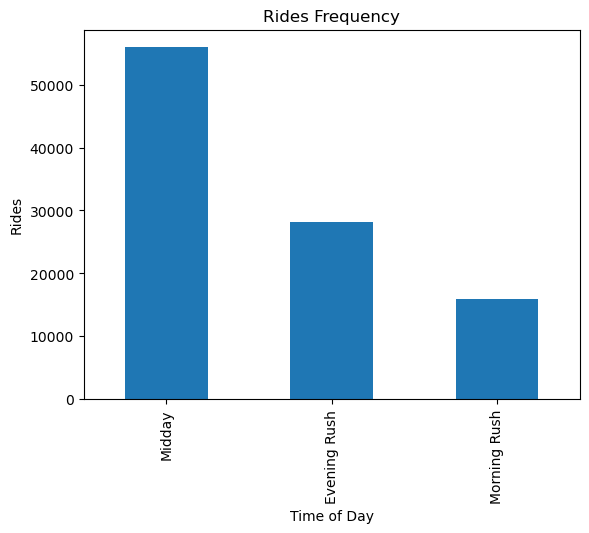

In [125]:
import matplotlib.pyplot as plt
#for Funzies
# Get counts
counts = rides["time_of_day"].value_counts()

# Plot
counts.plot(kind="bar")

plt.title("Rides Frequency")
plt.xlabel("Time of Day")
plt.ylabel("Rides")
plt.show()

#### Task 3c: Complex Filtering with query()

Use the `query()` method to find trips that meet **all** of these criteria:
- Casual riders (not members)
- Weekend trips  
- Duration greater than 20 minutes
- Electric bikes

Report:
1. How many trips match these criteria?
2. What percentage of all trips do they represent?
3. What is the average duration of these trips?

Hint: Column names work directly in `query()` strings. Combine conditions with `and`.

##### Your Code

In [139]:
rides_qf = rides.query("member_casual == 'casual' and is_weekend == True and trip_duration_min > 20 and rideable_type == 'electric_bike'")
print(rides_qf.shape[0])


1501


In [140]:
#percentage
query_percentage = (rides_qf.shape[0] / rides.shape[0])*100
print(query_percentage)

1.5010000000000001


In [141]:
average_duration = rides_qf["trip_duration_min"].mean()
print(average_duration)

40.37352101932046


#### Task 3d: Explicit Indexing Practice

Practice using `loc[]` and `iloc[]` for different selection tasks:

1. Use `iloc[]` to select the first 10 trips, showing only `member_casual`, `rideable_type`, and `trip_duration_min` columns
2. Use `loc[]` to select trips from October 15-17 (use date strings `'2024-10-15':'2024-10-17'`), showing the same three columns
3. Count how many trips occurred during this date range

Note: When using `iloc[]`, remember it's position-based (0-indexed). When using `loc[]` with the datetime index, you can slice using date strings.

##### Your Code

In [ ]:
# Task 3d code here...


#### Interpretation

Reflect on this problem and answer (briefly / concisely) the following questions:

1. `isin()` advantages: Compare using `isin(['A', 'B', 'C'])` versus `(col == 'A') | (col == 'B') | (col == 'C')`. Beyond readability, what practical advantage does `isin()` provide when filtering for many values (e.g., 20+ stations)?
2. Conditional assignment order: In Task 3b, why did we initialize all values to "Midday" before assigning rush hour categories? What would go wrong if you assigned categories in a different order, or didn't set a default?
3. `query()` vs boolean indexing: The `query()` method in Task 3c could have been written with boolean indexing instead. When would you choose `query()` over boolean indexing? When might boolean indexing be preferable despite being more verbose?

##### Your Answers

*Problem 3 interpretation here*


#### Follow-Up (Graduate Students Only)

Pandas supports a variety of indexing paradigms, including bracket notation (`df['col']`), label-based indexing (`loc[]`), and position-based indexing (`iloc[]`). The lecture recommended using bracket notation only for columns, and loc/iloc for everything else. Explain the rationale: why is this approach better than using bracket notation for everything, even though `df[0:5]` technically works for row slicing?

##### Your Answers

*Graduate follow-up interpretation here*

### Problem 4: Temporal Analysis and Export

Time-based patterns are crucial for understanding bike share usage. In this problem, you'll analyze when trips occur, how usage differs between rider types, and export filtered results. You'll use the datetime index you set in Problem 2 and the derived columns from Problems 2-3.

#### Task 4a: Identify Temporal Patterns

Use the datetime index to extract temporal components and identify usage patterns:

1. Extract the *hour* from the index and use `value_counts()` to find the most popular hour for trips. Report the peak hour and how many trips occurred during that hour.
2. Extract the *day name* from the index and use `value_counts()` to find the busiest day of the week. Report the day and number of trips.
3. Sort the results from step 2 to show days in order from Monday to Sunday (not by trip count). Use `sort_index()`.

Hint: Use `.dt.hour` and `.dt.day_name()` on the datetime index.

##### Your Code

In [ ]:
# Task 4a code here...


#### Task 4b: Compare Groups with groupby()

Use `groupby()` (introduced in 07a) to compare trip characteristics across different groups:

1. Calculate the average trip duration by rider type (`member_casual`). Which group takes longer trips on average?
2. Calculate the average trip duration by bike type (`rideable_type`). Which bike type has the longest average trip?
3. Count the number of trips by rider type using `groupby()` with `.size()`. Compare this with using `value_counts()` on the `member_casual` column - do they give the same result?

Note: Use single-key groupby only (one column at a time).

##### Your Code

In [ ]:
# Task 4b code here...


#### Task 4c: Filter, Sample, and Export

Create a filtered dataset for weekend electric bike trips and export it:

The provided code once again uses Path to create an `output` directory and constructs the full file path as `output/weekend_electric_trips.csv`. Use the `output_file` variable when calling `.to_csv()`.

1. Filter for trips where `is_weekend == True` and `rideable_type == 'electric_bike'`
2. Use `iloc[]` to select the first 1000 trips from this filtered dataset
3. Use `reset_index()` to convert the datetime index back to a column (so it's included in the export)
4. Export to CSV with filename `weekend_electric_trips.csv`, including only these columns: `started_at`, `ended_at`, `member_casual`, `trip_duration_min`, `time_of_day`
5. Use `index=False` to avoid writing the default numeric index to the file

After exporting, report how many total weekend electric bike trips existed before sampling to 1000.

##### Your Code

In [ ]:
# do not modify this setup code
from pathlib import Path

output_dir = Path('output')
output_dir.mkdir(exist_ok=True)
output_file = output_dir / 'weekend_electric_trips.csv'

# Task 4c code here...
# use the variable `output_file` as the filename for step 4


#### Interpretation

Reflect on this problem and answer the following questions:

1. `groupby() conceptual model`: Explain in your own words what `groupby()` does. Use the phrase "split-apply-combine" in your explanation and describe what happens at each stage.
2. `value_counts()` vs `groupby()`: In Task 4b.3, you compared two approaches for counting trips by rider type. When would you use `value_counts()` versus `groupby().size()`? Is there a situation where only one of them would work?
3. Index management for export: In Task 4c, why did we use `reset_index()` before exporting? What would happen if you exported with the datetime index still in place and used `index=False`?

##### Your Answers

*Problem 4 interpretation here*

#### Follow-Up (Graduate Students Only)

Compare `CSV` and _pickle_ formats for data storage and retrieval.

Pickle is Python's built-in serialization format that saves Python objects exactly as they exist in memory, preserving all data types, structures, and metadata. Unlike CSV (which converts everything to text), pickle is binary (not human readable) and maintains the complete state of your DataFrame. Also, pickle files only work in Python, while CSV is universal. Read more in the [Pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_pickle.html).

The code below investigates an interesting pattern: Do riders take longer trips from scenic lakefront stations even during rush hours? This could indicate tourists or recreational riders using these popular locations for leisure trips during typical commute times. The analysis filters for trips over 15 minutes that started from lakefront stations during morning (7-9am) or evening (4-6pm) rush hours, sorted by duration to see the longest trips first.

Run the code below, then answer the interpretation questions:

In [ ]:
import os

# the following lines were commented out since they were run in 4c
# from pathlib import Path
# output_dir = Path('output')

csv_file = output_dir / 'lakefront_rush_trips.csv'
pickle_file = output_dir / 'lakefront_rush_trips.pkl'

# Filter for interesting pattern: Long trips (>15 min) during rush hours
# from lakefront stations, sorted by duration
lakefront_rush = (rides
    .loc[(rides.index.hour.isin([7, 8, 9, 16, 17, 18]))]
    .loc[(rides['start_station_name'].str.contains('Lake Shore|Lakefront',
                                                    case=False,
                                                    na=False))]
    .loc[rides['trip_duration_min'] > 15]
    .sort_values('trip_duration_min', ascending=False)
    .head(1000)
    .reset_index()
    [['started_at', 'ended_at', 'start_station_name', 'end_station_name',
      'member_casual', 'rideable_type', 'trip_duration_min']]
)

print(f"Found {len(lakefront_rush)} long rush-hour trips from lakefront stations")

# Export to both formats
lakefront_rush.to_csv(csv_file, index=False)
lakefront_rush.to_pickle(pickle_file)

# Compare file sizes
csv_size = os.path.getsize(csv_file) / 1024  # Convert to KB
pickle_size = os.path.getsize(pickle_file) / 1024
print(f"\nCSV file size: {csv_size:.2f} KB")
print(f"Pickle file size: {pickle_size:.2f} KB")
print(f"Size difference: {abs(csv_size - pickle_size):.2f} KB")

# Compare load times
print("\nLoad time comparison:")
print("CSV:")
%timeit pd.read_csv(csv_file)
print("\nPickle:")
%timeit pd.read_pickle(pickle_file)

# Check data type preservation
# Note: CSV load without parse_dates loses datetime types
csv_loaded = pd.read_csv(csv_file)
pickle_loaded = pd.read_pickle(pickle_file)

print("\nData types from CSV (without parse_dates):")
print(csv_loaded.dtypes)
print("\nData types from Pickle:")
print(pickle_loaded.dtypes)

After running the code, answer these questions:

1. Method chaining: The analysis uses method chaining with a specific formatting pattern:

   ```python
   result = (df
       .method1()
       .method2()
       .method3()
   )
   ```

   This wraps the entire chain in parentheses, allowing each method to appear on its own line without backslashes. Discuss why this makes formatting more readable, how it makes debugging easier, how it relates to seeing changes in the code with git diff, and what downsides heavy chaining might have.
3. Data types: Compare the dtypes from CSV versus pickle. What types were preserved by pickle that were lost in CSV? Why is this preservation significant for subsequent analysis?
4. Trade-offs: Given your observations about size, speed, and type preservation, when would you choose pickle over CSV for your work? When would CSV still be the better choice despite pickle's advantages?


*Graduate follow-up interpretation here*

## Reflection

Address the following questions in a markdown cell:

1. NumPy vs Pandas
   - What was the biggest conceptual shift moving from NumPy arrays to Pandas DataFrames?
   - Which Pandas concept was most challenging: indexing (loc/iloc), missing data, datetime operations, or method chaining? How did you work through it?
2. Real Data Experience
   - How did working with real CSV data (with missing values, datetime strings, etc.) differ from hw2b's synthetic NumPy arrays?
   - Based on this assignment, what makes Pandas well-suited for data analysis compared to pure NumPy?
3. Learning & Application
   - Which new skill from this assignment will be most useful for your own data work?
   - On a scale of 1-10, how prepared do you feel to use Pandas for your own projects? What would increase that score?
4. Feedback
   - Time spent: ___ hours (breakdown optional)
   - Most helpful part of the assignment: ___
   - One specific improvement suggestion: ___

### Your Answers

*Reflection here*